In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import nltk
from textblob import TextBlob, Word
plt.style.use("fivethirtyeight")
import pyLDAvis, pyLDAvis.sklearn
from IPython.display import display
import plotly.express as px

from sklearn.manifold import TSNE
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB  
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import LatentDirichletAllocation,  TruncatedSVD, NMF

C:\Users\602772\AppData\Roaming\Python\Python37\site-packages\plotly\express\_doc.py:451: DeprecationWarning:

inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()

C:\Users\602772\AppData\Roaming\Python\Python37\site-packages\plotly\express\_doc.py:451: DeprecationWarning:

inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()

C:\Users\602772\AppData\Roaming\Python\Python37\site-packages\plotly\express\_doc.py:451: DeprecationWarning:

inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()

C:\Users\602772\AppData\Roaming\Python\Python37\site-packages\plotly\express\_doc.py:451: DeprecationWarning:

inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()

C:\Users\602772\AppData\Roaming\Python\Python37\site-packages\plotly\express\_doc.py:451: DeprecationWarning:

inspect.getargspec() 

In [2]:
papers = pd.read_excel('Paper_dataCompiled.xlsx')
papers.head()

,Source,Title,Abstract,Journal,Author,Date,Keyword,Keyword2,Keyword3,Keyword4,Keyword5,General,Citation,Field,Search Term
0,https://www.semanticscholar.org/paper/Space-ch...,Space-charge limited photocurrent.,""":""In 1971 Goodman and Rose predicted the occu...",Physical review letters,Valentin D. Mihailetchi and Jurjen Wildeman an...,2005,Fullerenes,Immunostimulating conjugate (antigen),Switch Device Component,Semiconductors,light intensity,"{""@context"":""http://schema.org"",""@graph"":[{""@t...","@article{Mihailetchi2005SpacechargeLP, title=...",Physics,Space
1,https://www.semanticscholar.org/paper/Separabl...,Separable dual-space Gaussian pseudopotentials.,""":""We present pseudopotential coefficients for...","Physical review. B, Condensed matter",Goedecker and Teter and Hutter,1996,Dual,Normal Statistical Distribution,Multiplication,NaN,NaN,"{""@context"":""http://schema.org"",""@graph"":[{""@t...","@article{Goedecker1996SeparableDG, title={Sep...",Physics,Space
2,https://www.semanticscholar.org/paper/Canonica...,Canonical dynamics: Equilibrium phase-space di...,""":""Nose has modified Newtonian dynamics so as ...","Physical review. A, General physics",Hoover,1985,Normal Statistical Distribution,Friction,CNS disorder,Test scaling,NaN,"{""@context"":""http://schema.org"",""@graph"":[{""@t...","@article{Hoover1985CanonicalDE, title={Canoni...",Physics,Space
3,https://www.semanticscholar.org/paper/Flat-spa...,Flat-space chiral gravity.,""":""We provide the first evidence for a hologra...",Physical review letters,Arjun Bagchi and St{\'e}phane Detournay and Da...,2012,Holographic principle,Quantum field theory,Calcifying Fibrous Pseudotumor,Hornbostelâ€“Sachs,Battery management system,"{""@context"":""http://schema.org"",""@graph"":[{""@t...","@article{Bagchi2012FlatspaceCG, title={Flat-s...",Physics,Space
4,https://www.semanticscholar.org/paper/Polariza...,Polarization demultiplexing in Stokes space.,""":""A technique is demonstrated for polarizatio...",Optics express,Bogdan Szafraniec and Bernd Nebendahl and Todd...,2010,chaperone-mediated autophagy,algorithm,Fiber Optic Cables,NaN,NaN,"{""@context"":""http://schema.org"",""@graph"":[{""@t...","@article{Szafraniec2010PolarizationDI, title=...",Physics,Space


In [3]:
papers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
Source         2000 non-null object
Title          1990 non-null object
Abstract       2000 non-null object
Journal        1756 non-null object
Author         2000 non-null object
Date           2000 non-null object
Keyword        1852 non-null object
Keyword2       1626 non-null object
Keyword3       1368 non-null object
Keyword4       1123 non-null object
Keyword5       896 non-null object
General        2000 non-null object
Citation       2000 non-null object
Field          2000 non-null object
Search Term    2000 non-null object
dtypes: object(15)
memory usage: 117.2+ KB


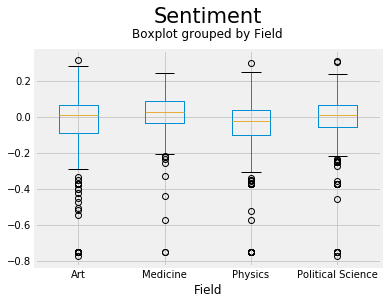

In [4]:
# Sentiment
def detect_sentiment(text):
    return TextBlob(text).sentiment.polarity

papers["Sentiment"] = papers["Abstract"].apply(detect_sentiment)

ax= papers.boxplot(column="Sentiment", by="Field")
ax.set_title("Sentiment", fontsize=21, y=1.1);

# Could try by sentence instead of by whole abstract.

In [5]:
papers["Field"].value_counts(normalize=True)

# So null model would be correct 25% of the time

Political Science    0.25
Physics              0.25
Medicine             0.25
Art                  0.25
Name: Field, dtype: float64

In [6]:
X_train, X_test, y_train, y_test = train_test_split(papers["Abstract"], papers["Field"])

# Need to train test split by category


#Fix split- shuffle
#rs = StratifiedShuffleSplit(n_splits=1, random_state=24, test_size=0.25, train_size=None)
#for train_index, test_index in rs.split(X,y):
#    print("TRAIN:", train_index, "TEST:", test_index)

#If array works don't need this
#X_traina = X.iloc[train_index,:]
#X_testa =  X.iloc[test_index,:]
#y_train = y[train_index]
#y_test = y[test_index]
#X_train1 = np.array(X_traina)
#X_test1 = np.array(X_testa)

Text(0.5, 1.0, 'Field')

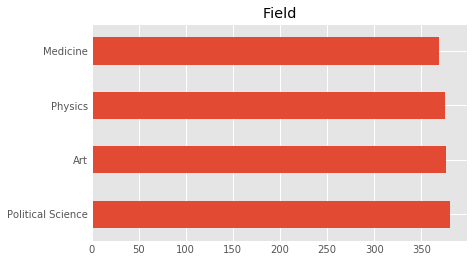

In [7]:
# Look at how even our split is
plotTrain = pd.DataFrame(data=y_train)
plotTrain["yTrain"] = pd.DataFrame(data=y_train)

plt.style.use("ggplot")
plotTrain.yTrain.value_counts().plot(kind="barh")
plt.title("Field")

# So about even, but we should still probably make the split exactly even.

In [8]:
def auto_vect(vect):
    X_train_dtm = vect.fit_transform(X_train)
    X_test_dtm = vect.transform(X_test)
    nb = MultinomialNB()
    nb.fit(X_train_dtm, y_train)
    y_pred_class_first = nb.predict(X_test_dtm)
    print((metrics.accuracy_score(y_test, y_pred_class_first)))

def make_lemmas(text):
    text = str(text).lower()
    words = TextBlob(text).words
    return [word.lemmatize(pos="v") for word in words]

In [9]:
vect = CountVectorizer(min_df=2, ngram_range=(1,4), stop_words="english")
auto_vect(vect)

#So this is 93.2% accurate
# This changes accuracy each time based on random train/test/split, so it may be good to fix the split

0.932


In [10]:
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)

# this will be our training prediction
y_pred_class_first = nb.predict(X_test_dtm)

# Calculate accuracy.
print((metrics.accuracy_score(y_test, y_pred_class_first)))

0.932


gnb = GaussianNB()
gnb.fit(X_train_dtm, y_train)

# this will be our training prediction
y_pred_class_second = gnb.predict(X_test_dtm)

# Calculate accuracy.
print((metrics.accuracy_score(y_test, y_pred_class_second)))

In [11]:
print((vect.get_feature_names()[6000:6050]))

['echocardiography', 'ecological', 'economic', 'economic cultural', 'economic cultural exclusion', 'economic cultural exclusion working', 'economic development', 'economic educational', 'economic growth', 'economic growth sustainable', 'economic growth sustainable development', 'economic impact', 'economic implications', 'economic political', 'economic social', 'economic social cultural', 'economic status', 'economic status women', 'economical', 'economically', 'economics', 'economics political', 'economics political science', 'economist', 'economy', 'economy emphasising', 'economy emphasising elements', 'economy emphasising elements fragmentation', 'ecosystem', 'ecosystems', 'ed', 'edema', 'edge', 'edge research', 'edges', 'editing', 'edition', 'editor', 'editorial', 'editors', 'eds', 'edu', 'educate', 'educated', 'educating', 'educating general', 'educating general public', 'educating general public potentially', 'education', 'education author']


# This is to show the relative fit of different methods

def fit_roc(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    score = round(model.score(X_test,y_test),2)
    fpr, tpr, _ = roc_curve(y_test.ravel(), y_pred_proba[:,1])
    roc_auc = auc(fpr, tpr)
    return fpr, tpr, roc_auc,score
sns.set_context("talk")
fig0 = plt.figure(figsize=(15,8));
plt.plot([0, 1], [0, 1], lw=2, color = 'black' , linestyle='--')
    
fpr1, tpr1, roc_auc1, score1 = fit_roc(GaussianNB(), X_train_dtm, X_test_dtm, y_train, y_test)
plt.plot(fpr1, tpr1, lw=2, color = 'brown', label='Gauss NB area=%0.2f,accuracy={}'.format(score1) % roc_auc1)
    
#fpr2, tpr2, roc_auc2, score2 = fit_roc(LogisticRegression(), X_train, X_test, y_train, y_test)
#plt.plot(fpr2, tpr2, lw=2, color = 'darkviolet', label='Log Reg area=%0.2f,accuracy={}'.format(score1) % roc_auc2)

#MultinomialNB()

In [12]:
#Show confusion matrix

In [13]:
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix', cmap=plt.cm.summer):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=20)
    plt.yticks(tick_marks, classes, fontsize=20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", 
                 color="white" if cm[i, j] < thresh else "black", fontsize=40)
    
    plt.tight_layout()
    plt.ylabel('True label', fontsize=30)
    plt.xlabel('Predicted label', fontsize=30)
    
    return plt


In [14]:
def topic_mod_lda(data,topics=5,iters=10,ngram_min=1, ngram_max=3, max_df=0.6, max_feats=5000, random_state=42):
    
    """ use count vectorizer to turn words into numbers for each document(rows)
    then use Latent Dirichlet Allocation to get topics"""
    
    vectorizer = CountVectorizer(ngram_range=(ngram_min,ngram_max), 
                             stop_words='english', 
                             max_df = max_df, 
                             max_features=max_feats)
      
    #  `fit (train), then transform` to convert text to a bag of words

    vect_data = vectorizer.fit_transform(data)
    
    lda = LatentDirichletAllocation(n_components=topics,
                                    max_iter=iters,
                                    random_state=random_state,
                                    learning_method='online',
                                    n_jobs=-1)
    
    lda_data = lda.fit_transform(vect_data)
    
    # to display a list of topic words and their scores 
    def display_topics(model, feature_names, no_top_words):
        for ix, topic in enumerate(model.components_):
            print("Topic ", ix)
            print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
    
    display_topics(lda, vectorizer.get_feature_names(),20)
    
    return vectorizer, vect_data, lda, lda_data

In [15]:
vect_mod, vect_data, lda_mod, lda_data = topic_mod_lda(papers["Abstract"],
                                                         topics=4,
                                                         iters=50,
                                                         ngram_min=1, 
                                                         ngram_max=2, 
                                                         max_df=0.5, 
                                                         max_feats=2000,
                                                         random_state=42)
#So need to do this for training data, for each of the 4 categories as categorized by our previous step

Topic  0
international health la research countries en social el information global public world development science national se policy que education article
Topic  1
sports injuries injury athletes risk training exercise patients sport performance physical concussion related activity high study studies age years participation
Topic  2
space time using field images results model phase optical dimensional color quantum theory imaging based painting method image paintings state
Topic  3
color used space paper based data use different new radiation using analysis results art work design visual colour digital research


In [16]:
topic_ind = np.argmax(lda_data, axis=1)
topic_ind.shape

#create labels for plotting with matplotlib 
labels_mpl = topic_ind

# put into dataframe for plotly
tsne_labels = pd.DataFrame(labels_mpl)

# save to csv here if not assigning labels and leaving as numbers
#tsne_labels.to_csv('./data/topic_numbers.csv')

In [17]:
# 0= Political Science, International
# 1= Medicine, Sports
# 2= Physics, Space
# 3= Art, Color
tsne_labels[tsne_labels==0] = "Political Science"
tsne_labels[tsne_labels==1] = "Medicine"
tsne_labels[tsne_labels==2] = "Physics"
tsne_labels[tsne_labels==3] = "Art"

In [18]:
papers["Topic Classification"]= tsne_labels
papers.head()

,Source,Title,Abstract,Journal,Author,Date,Keyword,Keyword2,Keyword3,Keyword4,Keyword5,General,Citation,Field,Search Term,Sentiment,Topic Classification
0,https://www.semanticscholar.org/paper/Space-ch...,Space-charge limited photocurrent.,""":""In 1971 Goodman and Rose predicted the occu...",Physical review letters,Valentin D. Mihailetchi and Jurjen Wildeman an...,2005,Fullerenes,Immunostimulating conjugate (antigen),Switch Device Component,Semiconductors,light intensity,"{""@context"":""http://schema.org"",""@graph"":[{""@t...","@article{Mihailetchi2005SpacechargeLP, title=...",Physics,Space,0.192755,Physics
1,https://www.semanticscholar.org/paper/Separabl...,Separable dual-space Gaussian pseudopotentials.,""":""We present pseudopotential coefficients for...","Physical review. B, Condensed matter",Goedecker and Teter and Hutter,1996,Dual,Normal Statistical Distribution,Multiplication,NaN,NaN,"{""@context"":""http://schema.org"",""@graph"":[{""@t...","@article{Goedecker1996SeparableDG, title={Sep...",Physics,Space,0.128791,Physics
2,https://www.semanticscholar.org/paper/Canonica...,Canonical dynamics: Equilibrium phase-space di...,""":""Nose has modified Newtonian dynamics so as ...","Physical review. A, General physics",Hoover,1985,Normal Statistical Distribution,Friction,CNS disorder,Test scaling,NaN,"{""@context"":""http://schema.org"",""@graph"":[{""@t...","@article{Hoover1985CanonicalDE, title={Canoni...",Physics,Space,-0.070000,Physics
3,https://www.semanticscholar.org/paper/Flat-spa...,Flat-space chiral gravity.,""":""We provide the first evidence for a hologra...",Physical review letters,Arjun Bagchi and St{\'e}phane Detournay and Da...,2012,Holographic principle,Quantum field theory,Calcifying Fibrous Pseudotumor,Hornbostelâ€“Sachs,Battery management system,"{""@context"":""http://schema.org"",""@graph"":[{""@t...","@article{Bagchi2012FlatspaceCG, title={Flat-s...",Physics,Space,-0.089286,Physics
4,https://www.semanticscholar.org/paper/Polariza...,Polarization demultiplexing in Stokes space.,""":""A technique is demonstrated for polarizatio...",Optics express,Bogdan Szafraniec and Bernd Nebendahl and Todd...,2010,chaperone-mediated autophagy,algorithm,Fiber Optic Cables,NaN,NaN,"{""@context"":""http://schema.org"",""@graph"":[{""@t...","@article{Szafraniec2010PolarizationDI, title=...",Physics,Space,0.095000,Physics


In [19]:
print((metrics.accuracy_score(papers["Field"], papers["Topic Classification"])))

0.7835


In [20]:
#Use our predicted categories by running classifer on all data
# Then split again
X_final = vect.fit_transform(papers["Abstract"])

nb.fit(X_final, papers["Field"])
pred_class = nb.predict(X_final)
pred_class

array(['Physics', 'Physics', 'Physics', ..., 'Art', 'Art', 'Art'],
      dtype='<U17')

In [21]:
papers["NB Classification"]= pred_class
print((metrics.accuracy_score(papers["Field"], papers["NB Classification"])))

0.98


In [22]:
art_papers= papers.where(papers["NB Classification"]=="Art")
art_papers= art_papers.dropna()
art_papers["Abstract"]

25      ":"truly remarkable. Our ability to see colors...
100     ":"The goal of our research is to enable artis...
131      of the 2D neural receptive fields found in th...
147     ":"Un etat de spin chiral est caracterise par ...
153     ":"A picture\" is a at object covered with pig...
                              ...                        
1972    ":"OUT OF THE PICTURE Martha Rosier: The Bower...
1974    ":"Usando algoritmos de procesamiento de image...
1975    ":"In the window of a private art galley in Te...
1986    ":"Already viewed by more than 20 million peop...
1988    ":"PURPOSE\nTo determine the correlation betwe...
Name: Abstract, Length: 129, dtype: object

In [23]:
medicine_papers= papers.where(papers["NB Classification"]=="Medicine")
medicine_papers= medicine_papers.dropna()
political_papers= papers.where(papers["NB Classification"]=="Political Science")
political_papers= political_papers.dropna()
physics_papers= papers.where(papers["NB Classification"]=="Physics")
physics_papers= physics_papers.dropna()

In [24]:
vect_mod, vect_data, lda_mod, lda_data = topic_mod_lda(political_papers["Abstract"],
                                                         topics=15,
                                                         iters=50,
                                                         ngram_min=1, 
                                                         ngram_max=2, 
                                                         max_df=0.5, 
                                                         max_feats=2000,
                                                         random_state=42)

Topic  0
convention commitment guidelines tobacco eeg notion governance epilepsy fraud collective individual articles oa various appropriate context special political published organizations
Topic  1
health use social media social media science education public policies reported students world health science based global public health general acculturation development use social
Topic  2
african tigani lecture city association primarily regarding psychiatry accepted mortality years model associated decision congress taken reasons parts psychiatric statement
Topic  3
research hf medical countries costs npdb trials clinical information american subjects data care cost informed increase physicians nations bank data bank
Topic  4
rights human right human rights countries workers right health migrant migration migrant workers international human labor economic data infant service law policies country new
Topic  5
study groups different data mental quantitative qualitative living focus refug

In [25]:
topic_ind = np.argmax(lda_data, axis=1)
topic_ind.shape

#create labels for plotting with matplotlib 
labels_mpl = topic_ind

# put into dataframe for plotly
tsne_labels = pd.DataFrame(labels_mpl)

In [26]:
tsne_labels[tsne_labels==0] = "convention commitment"
tsne_labels[tsne_labels==1] = "health use"
tsne_labels[tsne_labels==2] = "african tigani"
tsne_labels[tsne_labels==3] = "research hf"
tsne_labels[tsne_labels==4] = "rights human"
tsne_labels[tsne_labels==5] = "study groups"
tsne_labels[tsne_labels==6] = "iuhe health"
tsne_labels[tsne_labels==7] = "research stem"
tsne_labels[tsne_labels==8] = "intrusion state"
tsne_labels[tsne_labels==9] = "women gender"
tsne_labels[tsne_labels==10] = "population family"
tsne_labels[tsne_labels==11] = "cs programs"
tsne_labels[tsne_labels==12] = "tuberculosis collaboration"
tsne_labels[tsne_labels==13] = "zika disease"
tsne_labels[tsne_labels==14] = "scientific icc"

In [27]:
tsne_labels

,0
0,women gender
1,rights human
2,research hf
3,intrusion state
4,iuhe health
...,...
134,scientific icc
135,intrusion state
136,scientific icc
137,african tigani


In [28]:
tsne_labels

,0
0,women gender
1,rights human
2,research hf
3,intrusion state
4,iuhe health
...,...
134,scientific icc
135,intrusion state
136,scientific icc
137,african tigani


In [29]:
#political_papers["Topic"]= final_labels["ok"]
political_papers

,Source,Title,Abstract,Journal,Author,Date,Keyword,Keyword2,Keyword3,Keyword4,Keyword5,General,Citation,Field,Search Term,Sentiment,Topic Classification,NB Classification
504,https://www.semanticscholar.org/paper/Internat...,International spaces promote peace,""":""Lessons are still being learnt from the Ant...",Nature,Paul Arthur Berkman,2009,jurisdiction,Probability,Conflict (Psychology),Alveolar rhabdomyosarcoma,International Cooperation,"{""@context"":""http://schema.org"",""@graph"":[{""@t...","@article{Berkman2009InternationalSP, title={I...",Political Science,International,-0.750000,Political Science,Political Science
507,https://www.semanticscholar.org/paper/DB-289-I...,DB-289 Immtech International.,""":""DB-289, an oral diamidoxime prodrug of DB-7...",IDrugs : the investigational drugs journal,Clive Leonard Yeates,2003,Genus Pneumocystis,DB 289,Pneumocystis jiroveci pneumonia,Malaria,Trypanosomiasis,"{""@context"":""http://schema.org"",""@graph"":[{""@t...","@article{Yeates2003DB289II, title={DB-289 Imm...",Political Science,International,-0.162500,Political Science,Political Science
508,https://www.semanticscholar.org/paper/Extrater...,Extraterrestrial intelligence: an internationa...,""":""The human species is now able to communicat...",Science,Carl Sagan,1982,Civilization,paragraphs,subsidiary,Search Engine,radiofrequency,"{""@context"":""http://schema.org"",""@graph"":[{""@t...","@article{Sagan1982ExtraterrestrialIA, title={...",Political Science,International,0.072634,Art,Political Science
511,https://www.semanticscholar.org/paper/The-Firs...,The First International Standard for Somatropi...,""":""Following an earlier decision to move away ...",Growth regulation,Adrian F. Bristow and R. E. Gaines-Das and S. ...,1995,Somatropin,Biological Assay,milligram,Laboratory,Recombinants,"{""@context"":""http://schema.org"",""@graph"":[{""@t...","@article{Bristow1995TheFI, title={The First I...",Political Science,International,-0.084559,Medicine,Political Science
515,https://www.semanticscholar.org/paper/Understa...,Understanding international crime trends: the ...,""":""This study shows a very strong association ...",Environmental research,Rick Nevin,2007,Lead Poisoning,Crime Act,Cognition Disorders,Attention deficit hyperactivity disorder,Gasoline,"{""@context"":""http://schema.org"",""@graph"":[{""@t...","@article{Nevin2007UnderstandingIC, title={Und...",Political Science,International,0.015361,Medicine,Political Science
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042,https://www.semanticscholar.org/paper/Sexually...,Sexually selected signals are not similar to s...,""":""The handicap principle is a simple but powe...",Trends in ecology & evolution,Thomas Getty,2006,Sports,Plant Roots,Generalization (Psychology),Trait,Stimulation (motivation),"{""@context"":""http://schema.org"",""@graph"":[{""@t...","@article{Getty2006SexuallySS, title={Sexually...",Medicine,Sports,0.106713,Political Science,Political Science
1611,https://www.semanticscholar.org/paper/The-Evol...,The Evolving Surgeon Image.,""":""The stereotype of the abrasive, technically...",AMA journal of ethics,Heather J. Logghe and Tyler Rouse and Alec C. ...,2018,Stereotyping,Stereotypic Movement Disorder,Mental Processes,Voice,Frustration,"{""@context"":""http://schema.org"",""@graph"":[{""@t...","@article{Logghe2018TheES, title={The Evolving...",Art,Color,0.102063,Political Science,Political Science
1622,https://www.semanticscholar.org/paper/Theoreti...,Theoretical and technological building blocks ...,""":""Abstract\nModern science is a main driver o...",The European Physical Journal Special Topics,Frank van Harmelen and George Kampis and Katy ...,2012,Emergence,Competitive analysis (online algorithm),Scientific literature,Existential quantification,Archive,"{""@context"":""http://schema.org"",""@graph"":[{""@t...","@article{Harmelen2012TheoreticalAT, title={Th...",Art,Color,0.008362,Political Science,Political Science
1662,http

#Topic modelling: 
cm = confusion_matrix(y_test, Y_pred)
fig = plt.figure(figsize=(8, 8))
plot = plot_confusion_matrix(cm, classes=['Non','Transfused'], normalize=False)
plt.savefig(path + path2 + "NB_confusion_matrix.svg")
plt.show()
print(cm)

In [30]:
topic_index = np.argmax(mod_dat, axis=1)
topic_ind.shape
y=topic_ind
 
# create text labels for plotting
tsne_labels= pd.DataFrame(y)
tsne_labels.rename(columns={0:'topic'},inplace=True)
 
# you can then do tsne with this to see if similar docs have been assigned similar topics. 
 
# a t-SNE model
# angle value close to 1 means sacrificing accuracy for speed
# pca initializtion usually leads to better results 
tsne_model = TSNE(n_components=3, verbose=1, random_state=44, angle=.50,
                  perplexity=18,early_exaggeration=1,learning_rate=50.0)#, init='pca'
 
# 20-D -> 3-D
tsne_lda = tsne_model.fit_transform(mod_dat)
tsne_data = pd.DataFrame(tsne_lda)
 
ty = pd.merge(tsne_data,tsne_labels, left_index=True, right_index=True, how='outer')
ty.topic.astype(str,inplace=True)
ty.head()
 
# plot interactive 3D
fig = px.scatter_3d(ty, x='0', y='1', z='2',
              color='topic', size='max_topic_val', size_max=28, title='25 topics', opacity=0.99)
fig.show()


NameError: name 'mod_dat' is not defined

In [ ]:
#y_pred_class

# print(metrics.accuracy_score(papers["Field"], y_pred_class_first))

In [ ]:
# Re train classifier on all data
# Get document with all classes
# pass in each class to topic modeler as a list
#